In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.cluster import KMeans

plt.style.use('seaborn')

In [69]:
df = pd.read_csv('cleaned_data/dds11.csv')

In [70]:
# Make Categorical Variables
df['age_range'] = pd.Categorical(df['age_range'], 
                                 categories=['14-19', '20-26', '27-33',
                                             '34-50', '51-69', '70 or older'],
                                 ordered=True)
df['income'] = pd.Categorical(df['income'], 
               categories=['Less than $29,999', '$30,000 to $49,999',
                           '$50,000 to $99,999', '$100,000 to $299,999',
                           'More than $300,000', 'Do not know'], ordered=True)
df['willing_to_pay_no_ads_news'] = pd.Categorical(df['willing_to_pay_no_ads_news'],
                                                  categories=['Agree strongly', 'Agree somewhat',
                                                              'Disagree somewhat', 'Disagree strongly',
                                                              'N/A; I do not have a basis to answer'],
                                                 ordered=True)

### Groups to Categorize:
1. Age Range
2. Gender
3. Region
4. Income
5. Ethnicitiy

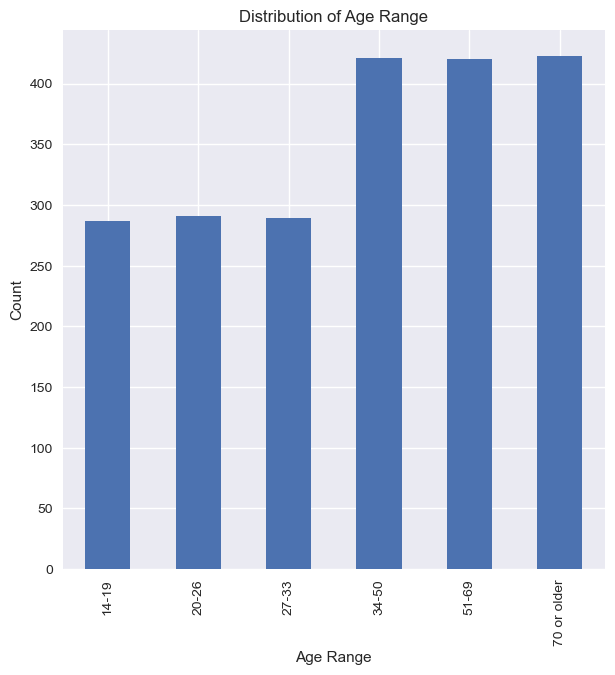

In [71]:
# Plot Distribution of Each of Those Groups

# Age Range
plt.figure(figsize=(7,7))
pd.Categorical(df['age_range'])\
    .value_counts()\
    .plot(kind='bar')
plt.title('Distribution of Age Range')
plt.xlabel('Age Range'); plt.ylabel('Count')
plt.show()

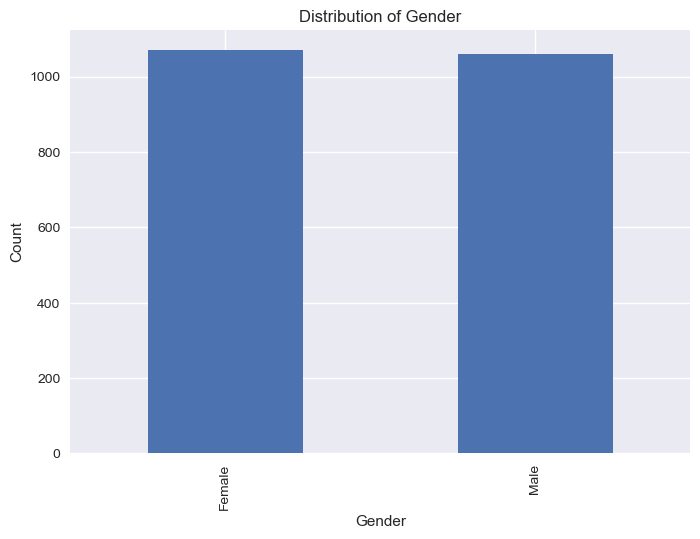

In [72]:
# Distribution of Gender
df['gender'].value_counts().plot(kind='bar')
plt.title('Distribution of Gender')
plt.xlabel('Gender'); plt.ylabel('Count')
plt.show()

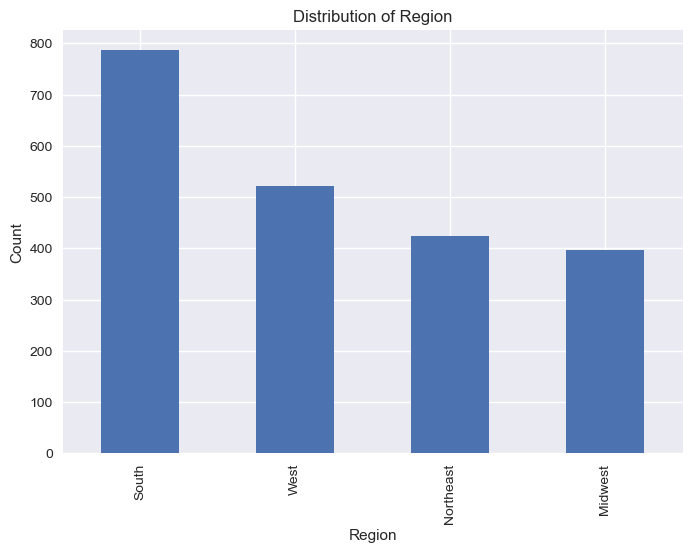

In [73]:
# Distribution of Region
df['region'].value_counts().plot(kind='bar')
plt.title('Distribution of Region')
plt.xlabel('Region'); plt.ylabel('Count')
plt.show()

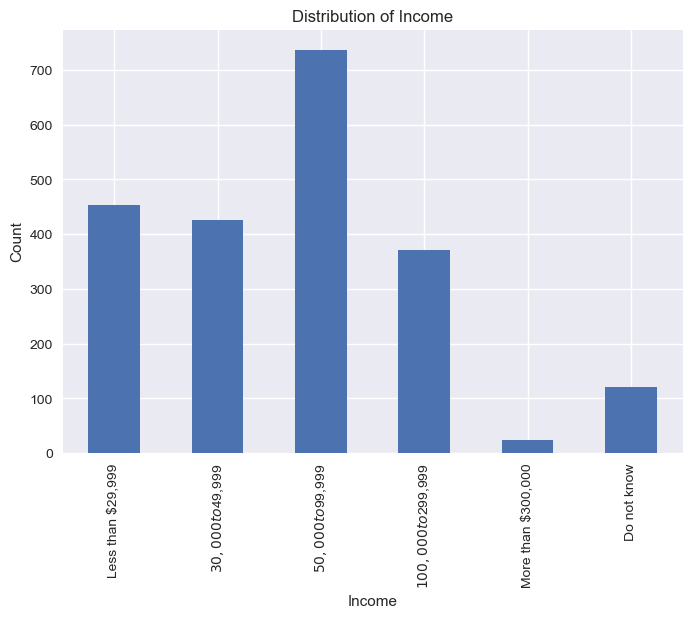

In [74]:
# Distribution of Income
pd.Categorical(df['income'])\
    .value_counts().plot(kind='bar')
plt.title('Distribution of Income')
plt.xlabel('Income'); plt.ylabel('Count')
plt.show()

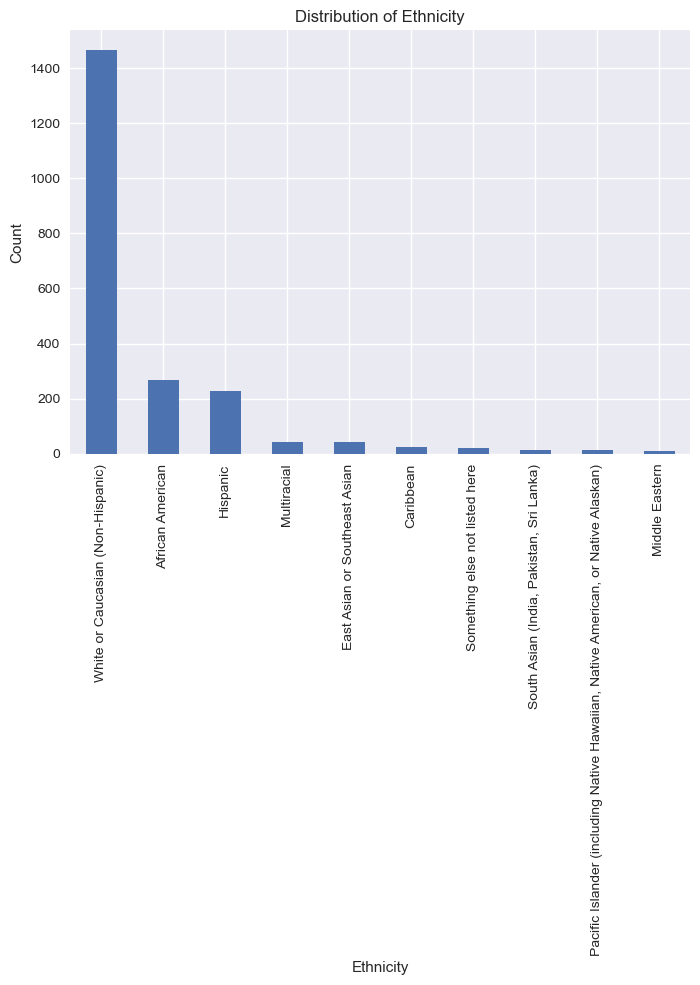

In [75]:
# Distribution of Ethnicity
df['ethnicity'].value_counts().plot(kind='bar')
plt.title('Distribution of Ethnicity')
plt.xlabel('Ethnicity'); plt.ylabel('Count')
plt.show()

### Breakdown of Habits By Group

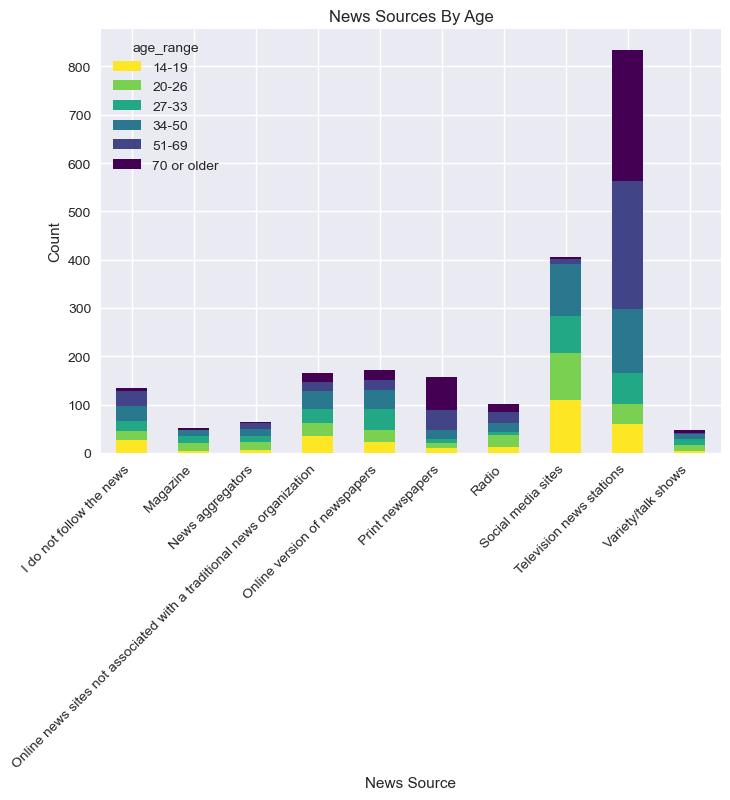

In [76]:
df[['age_range', 'news_source']].value_counts().reset_index()\
    .pivot(index='news_source', columns='age_range', values=0)\
    .plot(kind='bar', stacked=True, colormap='viridis_r')
plt.xticks(rotation=45, ha='right')
plt.title('News Sources By Age')
plt.xlabel('News Source'); plt.ylabel('Count')
plt.show()

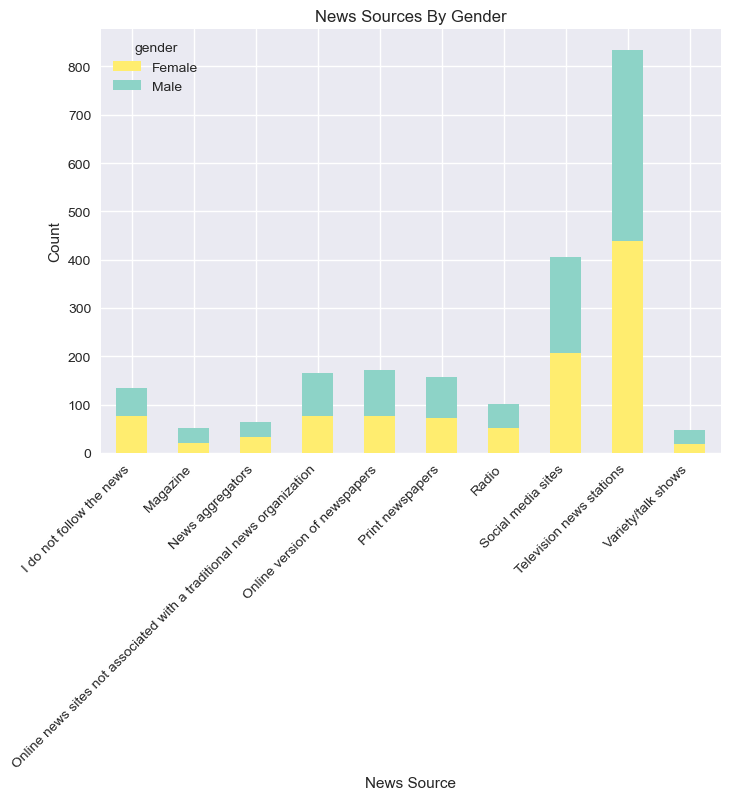

In [77]:
df[['gender', 'news_source']].value_counts().reset_index()\
    .pivot(index='news_source', columns='gender', values=0)\
    .plot(kind='bar', stacked=True, colormap='Set3_r')
plt.xticks(rotation=45, ha='right')
plt.title('News Sources By Gender')
plt.xlabel('News Source'); plt.ylabel('Count')
plt.show()

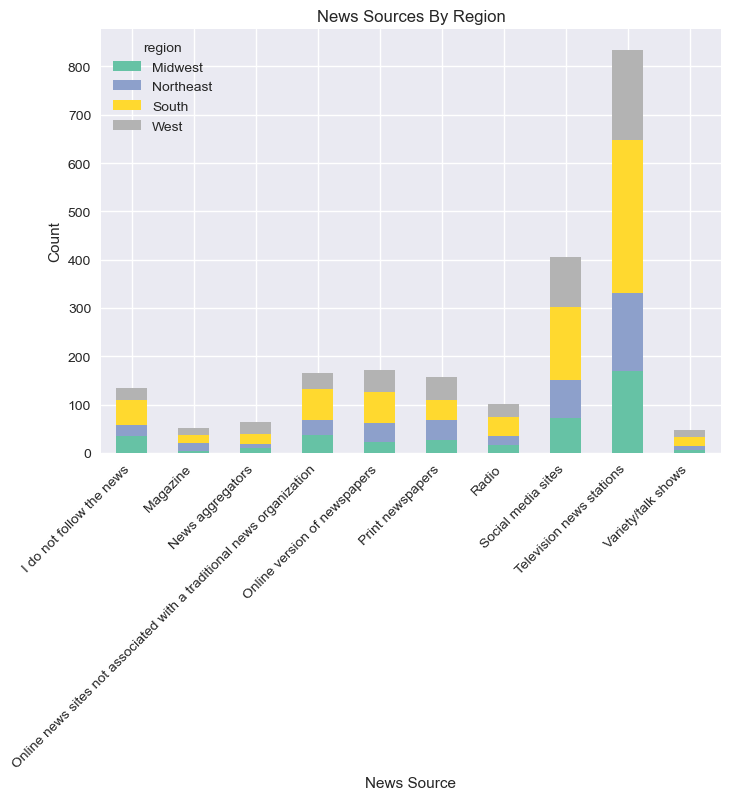

In [78]:
df[['region', 'news_source']].value_counts().reset_index()\
    .pivot(index='news_source', columns='region', values=0)\
    .plot(kind='bar', stacked=True, colormap='Set2')
plt.xticks(rotation=45, ha='right')
plt.title('News Sources By Region')
plt.xlabel('News Source'); plt.ylabel('Count')
plt.show()

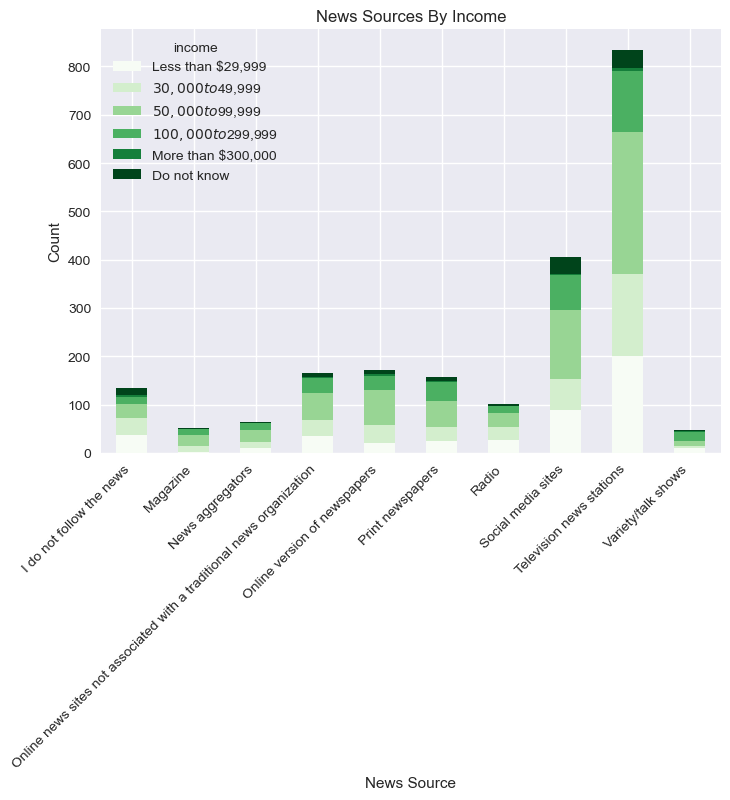

In [79]:
df[['income', 'news_source']].value_counts().reset_index()\
    .pivot(index='news_source', columns='income', values=0)\
    .plot(kind='bar', stacked=True, colormap='Greens')
plt.xticks(rotation=45, ha='right')
plt.title('News Sources By Income')
plt.xlabel('News Source'); plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'I would rather pay for news online in exchange for not being exposed to advertisements\n')

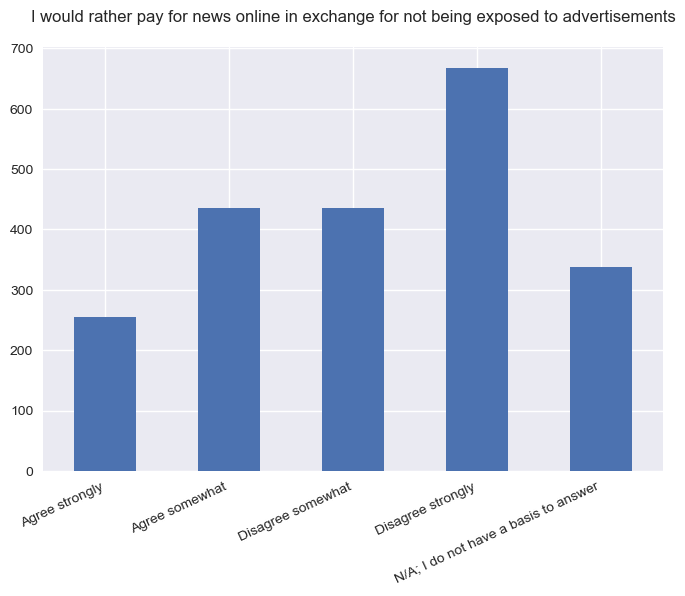

In [80]:
pd.Categorical(df['willing_to_pay_no_ads_news'])\
    .value_counts().plot(kind='bar')
plt.xticks(rotation=25, ha='right')
plt.title('I would rather pay for news online in exchange for not being exposed to advertisements\n')

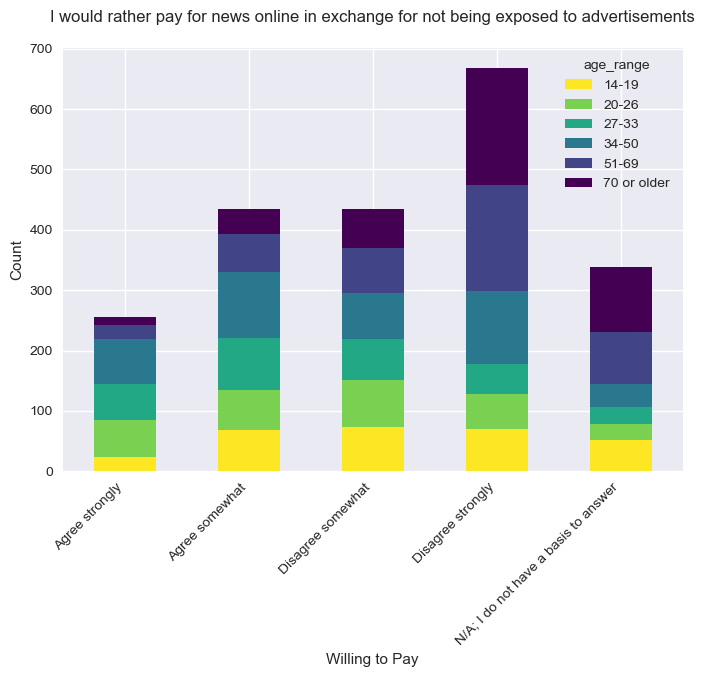

In [81]:
df[['willing_to_pay_no_ads_news', 'age_range']].value_counts().reset_index()\
    .pivot(index='willing_to_pay_no_ads_news', columns='age_range', values=0)\
    .plot(kind='bar', stacked=True, colormap='viridis_r')
plt.xticks(rotation=45, ha='right')
plt.title('I would rather pay for news online in exchange for not being exposed to advertisements\n')
plt.xlabel('Willing to Pay'); plt.ylabel('Count')
plt.show()

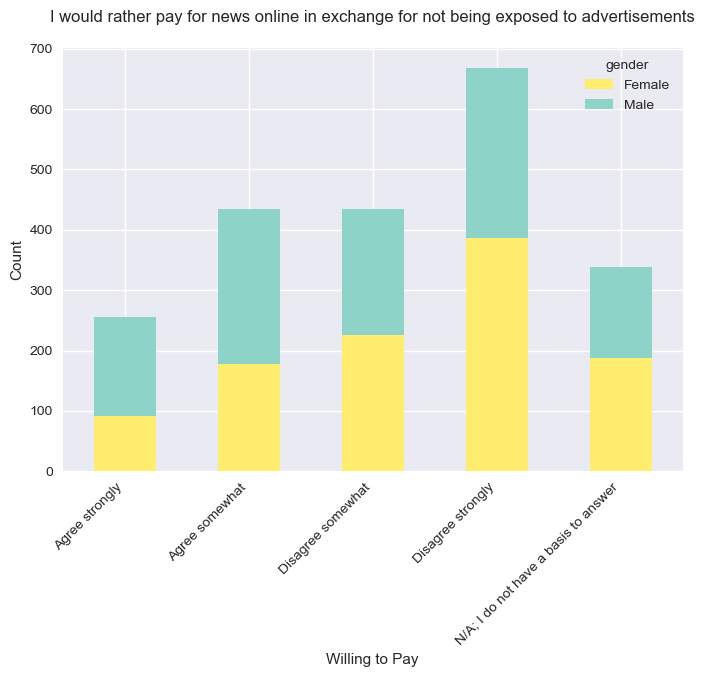

In [82]:
df[['willing_to_pay_no_ads_news', 'gender']].value_counts().reset_index()\
    .pivot(index='willing_to_pay_no_ads_news', columns='gender', values=0)\
    .plot(kind='bar', stacked=True, colormap='Set3_r')
plt.xticks(rotation=45, ha='right')
plt.title('I would rather pay for news online in exchange for not being exposed to advertisements\n')
plt.xlabel('Willing to Pay'); plt.ylabel('Count')
plt.show()

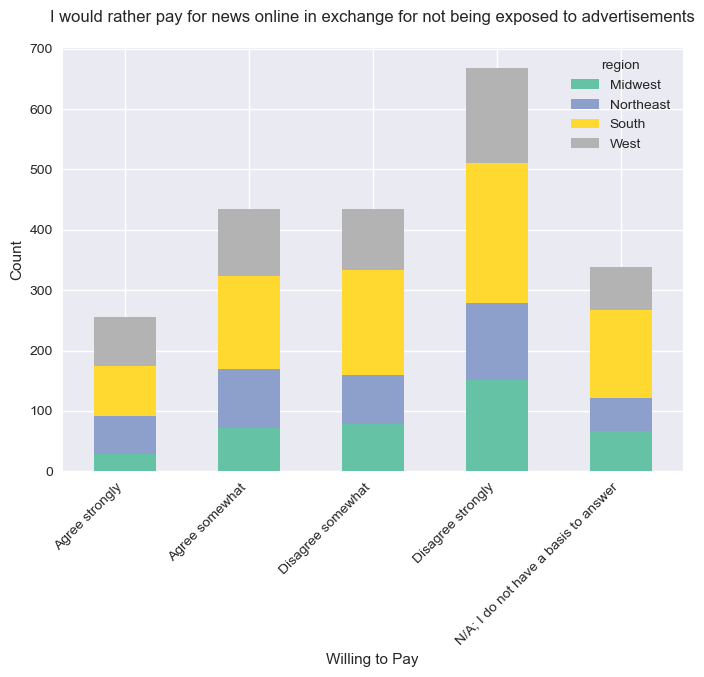

In [83]:
df[['willing_to_pay_no_ads_news', 'region']].value_counts().reset_index()\
    .pivot(index='willing_to_pay_no_ads_news', columns='region', values=0)\
    .plot(kind='bar', stacked=True, colormap='Set2')
plt.xticks(rotation=45, ha='right')
plt.title('I would rather pay for news online in exchange for not being exposed to advertisements\n')
plt.xlabel('Willing to Pay'); plt.ylabel('Count')
plt.show()

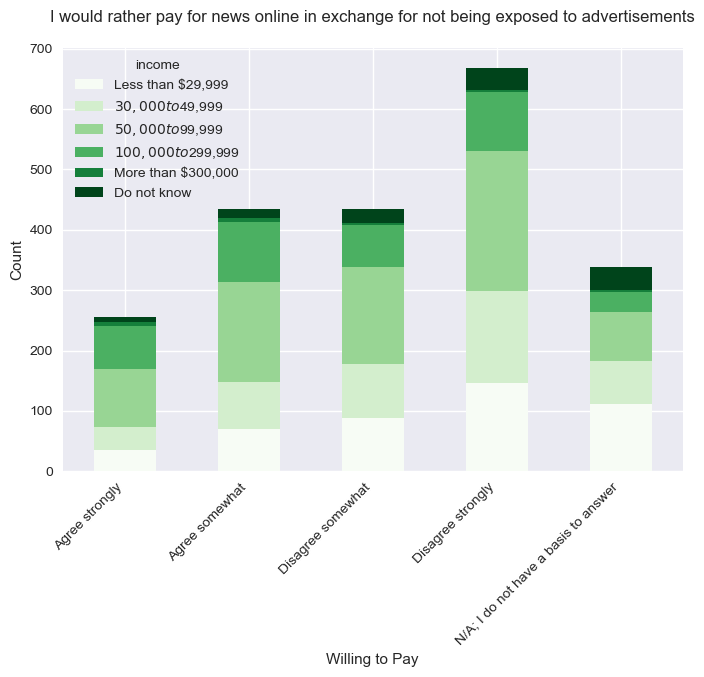

In [84]:
df[['willing_to_pay_no_ads_news', 'income']].value_counts().reset_index()\
    .pivot(index='willing_to_pay_no_ads_news', columns='income', values=0)\
    .plot(kind='bar', stacked=True, colormap='Greens')
plt.xticks(rotation=45, ha='right')
plt.title('I would rather pay for news online in exchange for not being exposed to advertisements\n')
plt.xlabel('Willing to Pay'); plt.ylabel('Count')
plt.show()

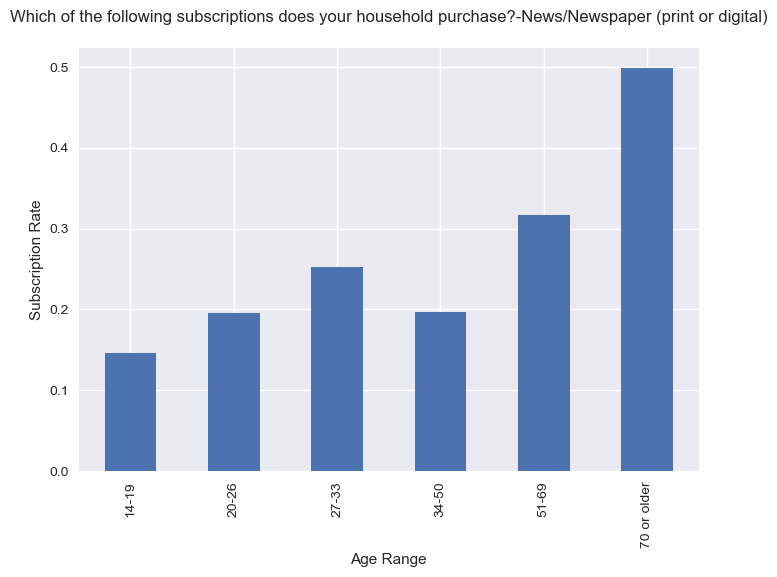

In [85]:
df[['age_range', 'subscriber_newspaper']]\
    .groupby('age_range')\
    .apply(lambda x: x['subscriber_newspaper'].sum() / x['age_range'].count())\
    .plot(kind='bar')
plt.title('Which of the following subscriptions does your household purchase?-News/Newspaper (print or digital)\n')
plt.xlabel('Age Range'); plt.ylabel('Subscription Rate')
plt.show()

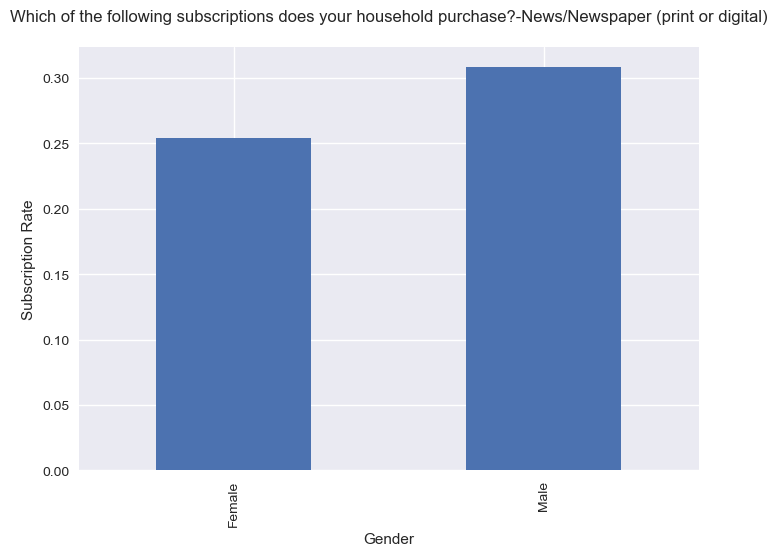

In [86]:
df[['gender', 'subscriber_newspaper']]\
    .groupby('gender')\
    .apply(lambda x: x['subscriber_newspaper'].sum() / x['gender'].count())\
    .plot(kind='bar')
plt.title('Which of the following subscriptions does your household purchase?-News/Newspaper (print or digital)\n')
plt.xlabel('Gender'); plt.ylabel('Subscription Rate')
plt.show()

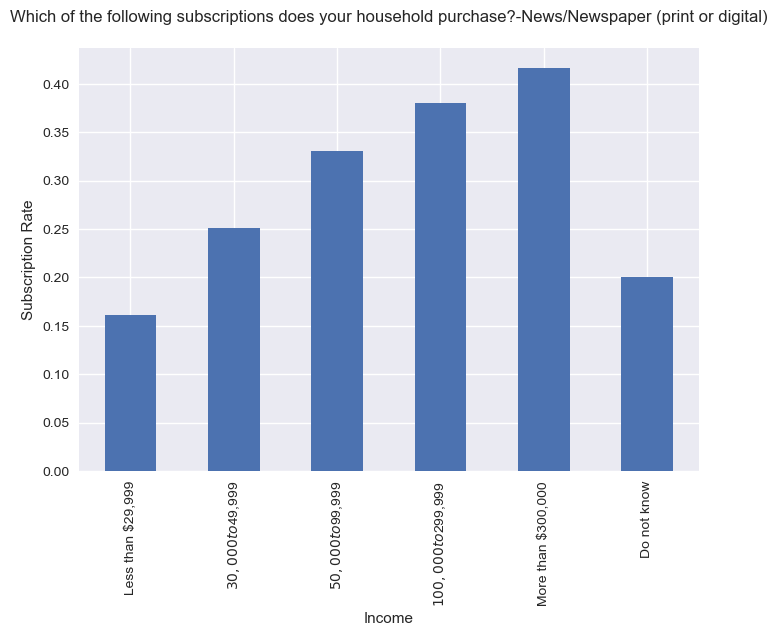

In [87]:
df[['income', 'subscriber_newspaper']]\
    .groupby('income')\
    .apply(lambda x: x['subscriber_newspaper'].sum() / x['income'].count())\
    .plot(kind='bar')
plt.title('Which of the following subscriptions does your household purchase?-News/Newspaper (print or digital)\n')
plt.xlabel('Income'); plt.ylabel('Subscription Rate')
plt.show()

## Unsupervised learning

What are some latent factors for market segmentation. Can we cluster people into distinct groups and explore the characteristics of these groups?

[Write a longer paragraph]

In [88]:
# normalize the age data
df['age_norm'] = (df.age - df.age.mean()) / df.age.std()

# Get all willing to pay vars
willing_to_pay_vars = [col for col in df.columns if 'willing_to_pay' in col]
demographic_vars = ['age_norm', 'income', 'gender']

# Encode vars

var_map = {
    'Agree somewhat': 1,
    'Agree strongly': 2,
    'Disagree somewhat': 3,
    'Disagree strongly': 4,
    'N/A; I do not have a basis to answer': 5
}

for var in willing_to_pay_vars:
    df[var] = df[var].map(var_map)

# Convert categorical demographic variables to numerical features
income_map = {
    'Less than $29,999': 1,
    '$30,000 to $49,999': 2,
    '$50,000 to $99,999': 3,
    '$100,000 to $299,999': 4,
    'More than $300,000': 5,
    'Do not know': 6
}
df['income'] = df['income'].map(income_map)

gender_map = {
    'Male': 1,
    'Female': 2,
}
df['gender'] = df['gender'].map(gender_map)

ethnicity_map = {}
for i, ethno in enumerate(np.unique(df.ethnicity)):
    ethnicity_map[ethno] = i

df['ethnicity'] = df['ethnicity'].map(ethnicity_map)

clustering_vars = (willing_to_pay_vars + demographic_vars + ['ethnicity', 'children'] + [col for col in df.columns if 'plan_to_purchase' in col] +
                   [col for col in df.columns if 'home_entertainment' in col or 'subscriber' in col])
                        


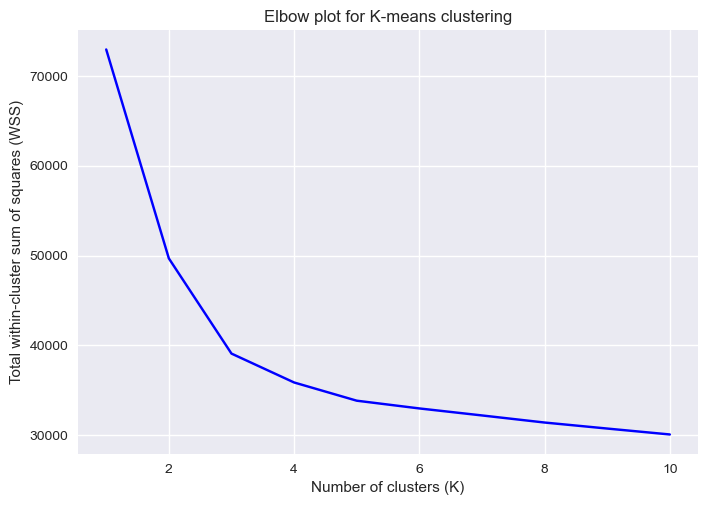

In [89]:
# Make elbow plot to choose K

X = df[clustering_vars]

# Define the range of K values to test
K_range = range(1, 11)

# Run the K-means algorithm for each value of K
WSS = []
for k in K_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    WSS.append(kmeans.inertia_)

# Plot the elbow plot
plt.plot(K_range, WSS, 'bx-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Total within-cluster sum of squares (WSS)')
plt.title('Elbow plot for K-means clustering')
plt.show()


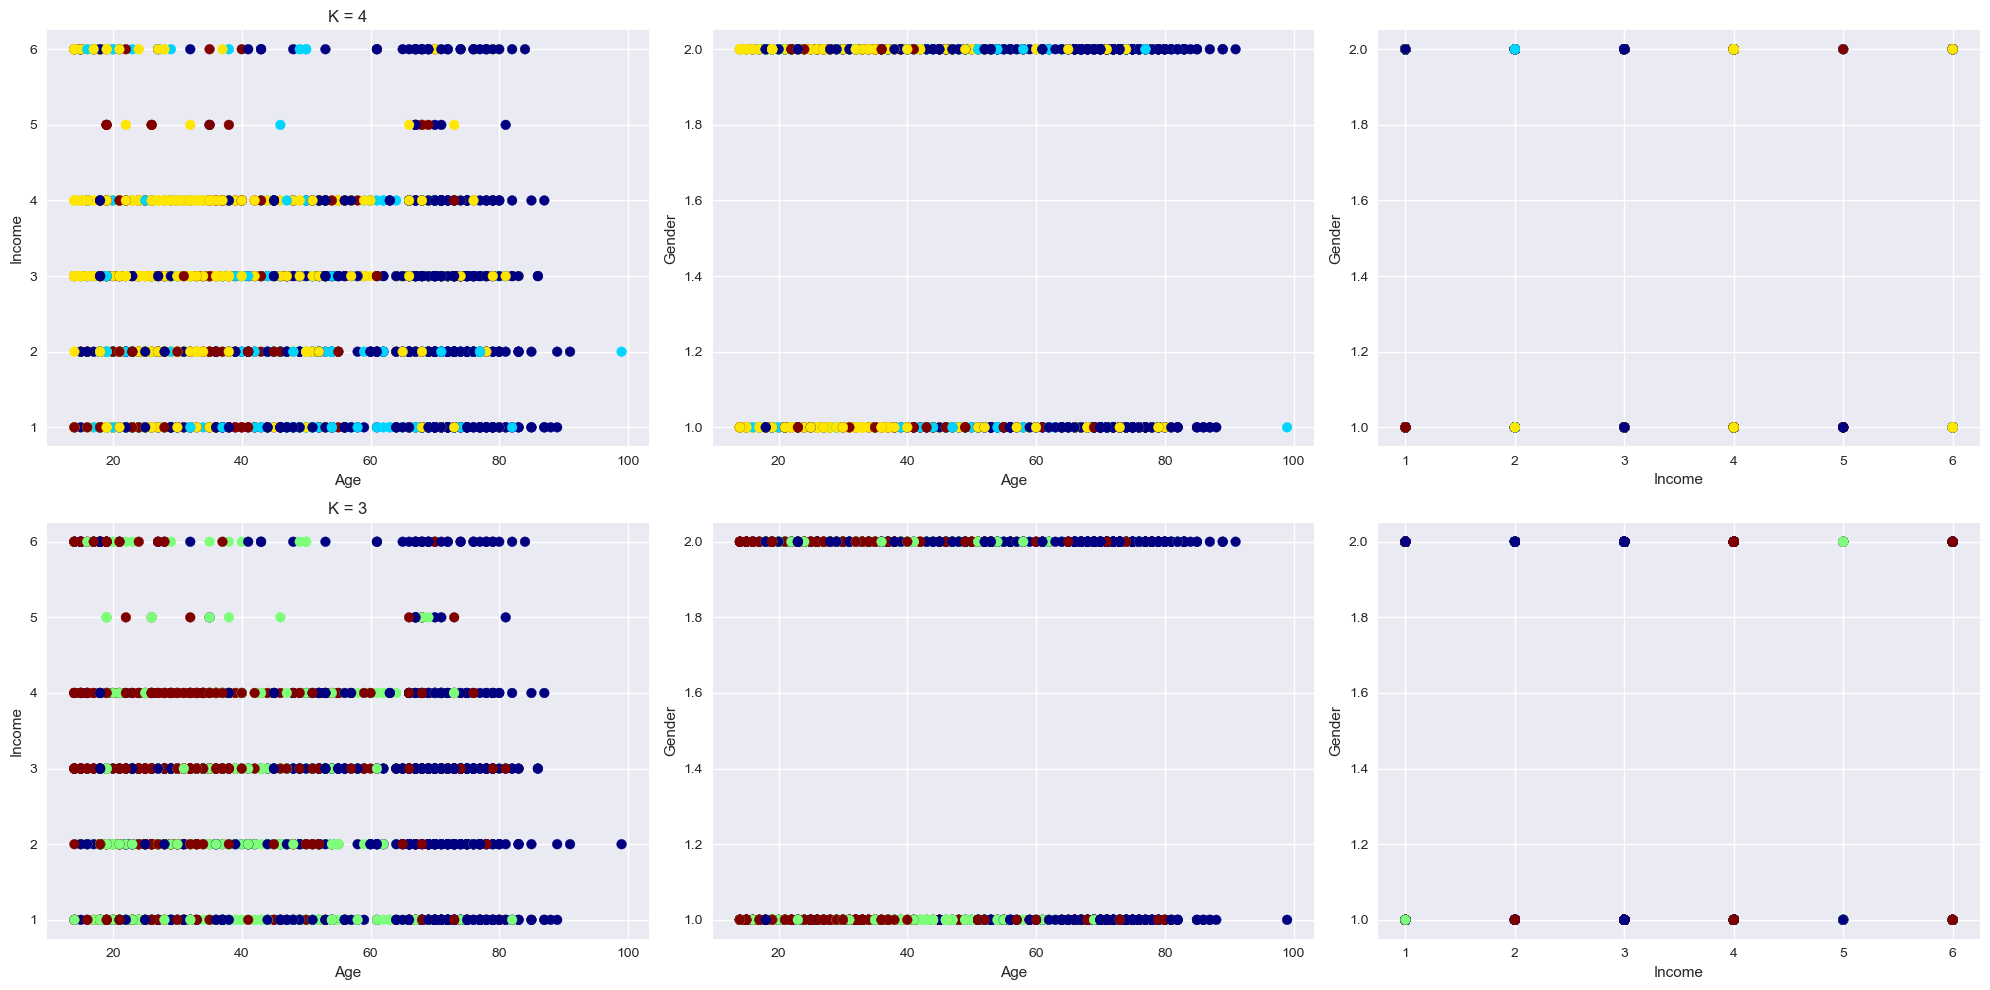

In [90]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder

# Perform k-means clustering
k_values = [4, 3]

# create a figure with subplots
fig, axes = plt.subplots(len(k_values), len(demographic_vars), figsize=(20, 10))


# Iterate over each K-means value and create a scatter plot for age vs. income, age vs. gender, and income vs. gender
for i, k in enumerate(k_values):

    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[clustering_vars])
    labels = kmeans.labels_

    # Create scatter plots for age vs. income, age vs. gender, and income vs. gender on this row
    axes[i, 0].scatter(df.age, df.income, c=labels, cmap='jet')
    axes[i, 0].set_title(f'K = {k}')
    axes[i, 0].set_xlabel('Age')
    axes[i, 0].set_ylabel('Income')
    
    axes[i, 1].scatter(df.age, df.gender, c=labels, cmap='jet')
    axes[i, 1].set_xlabel('Age')
    axes[i, 1].set_ylabel('Gender')
    
    axes[i, 2].scatter(df.income, df.gender, c=labels, cmap='jet')
    axes[i, 2].set_xlabel('Income')
    axes[i, 2].set_ylabel('Gender')

plt.tight_layout()
plt.show()

We don't see very meaningful separation when plotting the clusters on some of the demographic variables

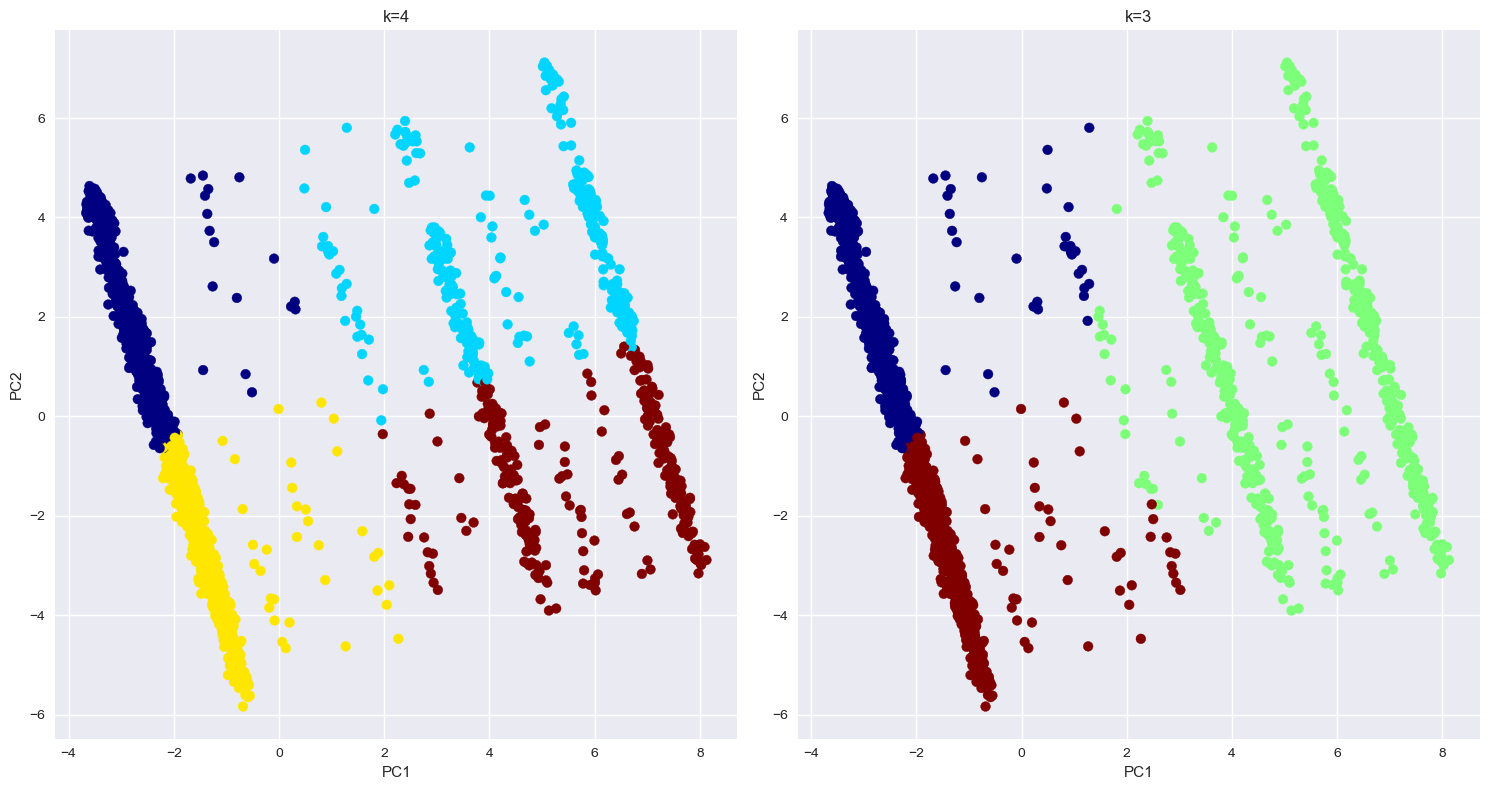

In [91]:
# Do the same as before, but plot against principal components
from sklearn.decomposition import PCA

# Perform PCA to reduce dimensionality to 2 principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df[clustering_vars])

# Add the 2 principal components to the dataframe
df['PC1'] = X_pca[:, 0]
df['PC2'] = X_pca[:, 1]

# create a figure with subplots
fig, axes = plt.subplots(1, len(k_values), figsize=(15, 8))


# Iterate over each K-means value and create a scatter plot for age vs. income, age vs. gender, and income vs. gender
for i, k in enumerate(k_values):

    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[clustering_vars])
    labels = kmeans.labels_
    
    # Plot PC1 vs PC2
    axes[i].scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='jet')
    axes[i].set_xlabel('PC1')
    axes[i].set_ylabel('PC2')
    axes[i].set_title(f'k={k}')
        
plt.tight_layout()
plt.show()
    



Now we start to see some meaningful separation. For K = 3, let's check what are the differences in the different assigned clusters

C:\Users\Abhilash Biswas\AppData\Local\Temp\ipykernel_32580\1453371450.py:12: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  proportions = counts.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))


<Figure size 1500x1000 with 0 Axes>

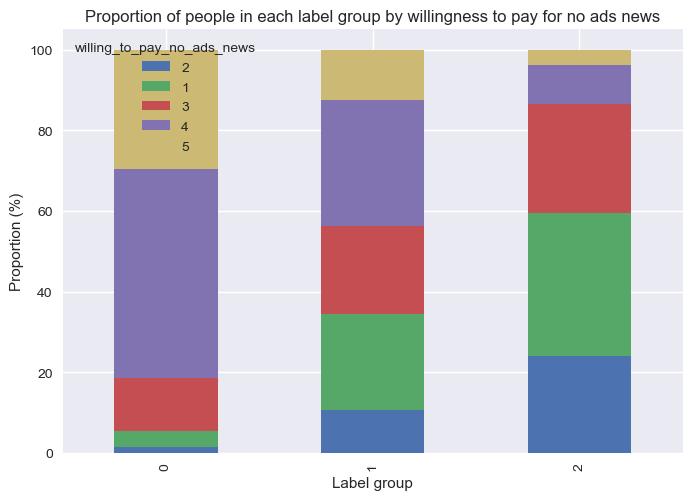

In [92]:
df_new = df.copy()

df_new['labels'] = labels

# Group the data by label and willing_to_pay_no_ads_news
grouped = df_new.groupby(['labels', 'willing_to_pay_no_ads_news'])

# Compute the count of each group
counts = grouped.size()

# Compute the proportion of each group by label
proportions = counts.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

# Reshape the proportions to a pivot table format
proportions = proportions.reset_index()
proportions = proportions.pivot(index='labels', columns='willing_to_pay_no_ads_news', values=0)

# Plot the proportions as a stacked bar chart
plt.figure(figsize=(15,10))


proportions.plot(kind='bar', stacked=True)
plt.xlabel('Label group')
plt.ylabel('Proportion (%)')
plt.title('Proportion of people in each label group by willingness to pay for no ads news')
plt.show()


# TO DO: Make the graph prettier

We can see that label group 1 and 2 have a higher change of agreeing to pay for news subscription. While we don't have a wider set of demographic variables, and unsupervised learning was used to find latent groups beyond demographic variables, let's check the age distribution in these groups

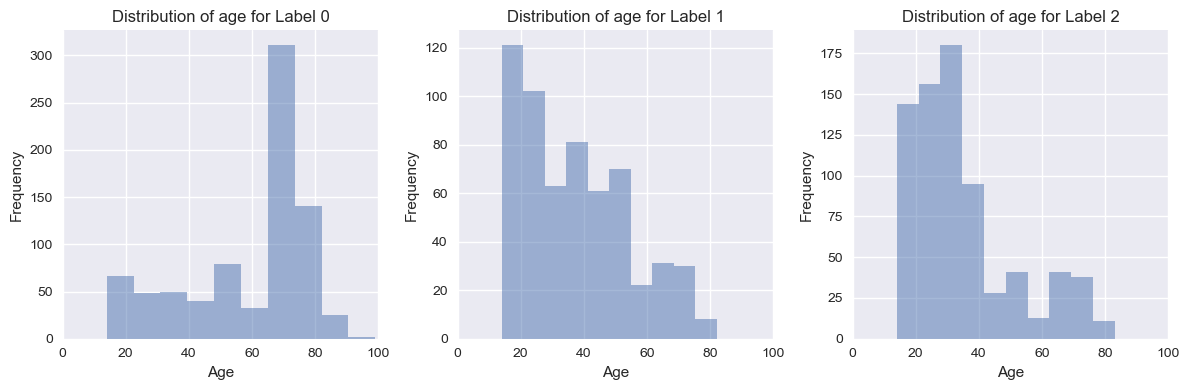

In [93]:
# Create a 1x3 grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Plot the distribution of age for each value of label in a separate subplot
for i, label in enumerate([0, 1, 2]):
    ax = axes[i]
    df_new[df_new['labels'] == label]['age'].plot(kind='hist', alpha=0.5, ax=ax)
    ax.set_xlabel('Age')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of age for Label {label}')
    ax.set_xlim(0, 100)

# Adjust the layout of the subplots
plt.tight_layout()

# Show the plot
plt.show()


We can see that the distribution skews young. Let's perform another unsupervised clustering, but instead of direct variables, use principal components as the features

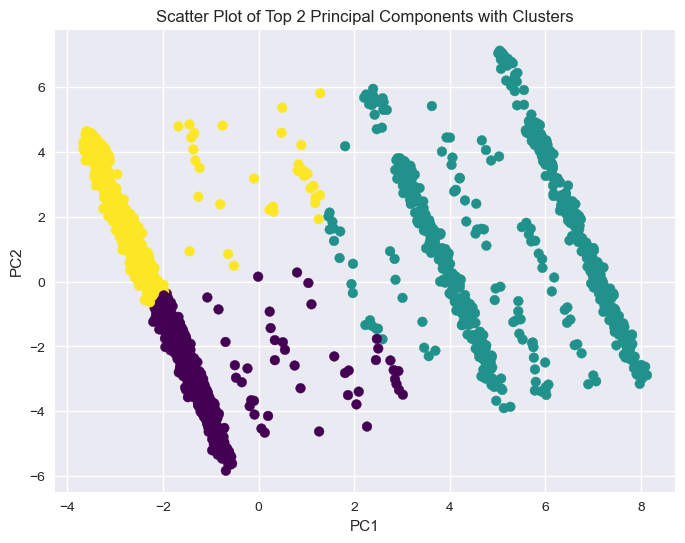

In [104]:
X = df[clustering_vars]

# Perform PCA to get the top 5 principal components
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)

# Apply k-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)

# Get the cluster labels
labels = kmeans.labels_

# Plot a scatter plot between PC1 and PC2 with color labels for each cluster
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter Plot of Top 2 Principal Components with Clusters')
plt.show()


We see similar behaviour as clustering on original variables and plotting against top 2 PC. Plotting PC0 against PC2 and PC3 is also interesting

## Supervised learning

Can we predict the outcome of the question: Are you willing to pay more to have ad free news access?

In [62]:
df = pd.read_csv('cleaned_data/dds11.csv')

# Make Categorical Variables
df['age_range'] = pd.Categorical(df['age_range'], 
                                 categories=['14-19', '20-26', '27-33',
                                             '34-50', '51-69', '70 or older'],
                                 ordered=True)
df['income'] = pd.Categorical(df['income'], 
               categories=['Less than $29,999', '$30,000 to $49,999',
                           '$50,000 to $99,999', '$100,000 to $299,999',
                           'More than $300,000', 'Do not know'], ordered=True)

willing_to_pay_vars = [col for col in df.columns if 'willing_to_pay' in col]

for var in willing_to_pay_vars:
    df[var] = pd.Categorical(df[var],
                                    categories=['Agree strongly', 'Agree somewhat',
                                                'Disagree somewhat', 'Disagree strongly',
                                                'N/A; I do not have a basis to answer'],
                                    ordered=True)

                                      precision    recall  f1-score   support

                      Agree somewhat       0.42      0.59      0.49        75
                      Agree strongly       0.68      0.31      0.42        49
                   Disagree somewhat       0.56      0.51      0.53       100
                   Disagree strongly       0.74      0.82      0.78       137
N/A; I do not have a basis to answer       0.81      0.71      0.76        66

                            accuracy                           0.63       427
                           macro avg       0.64      0.59      0.60       427
                        weighted avg       0.65      0.63      0.63       427



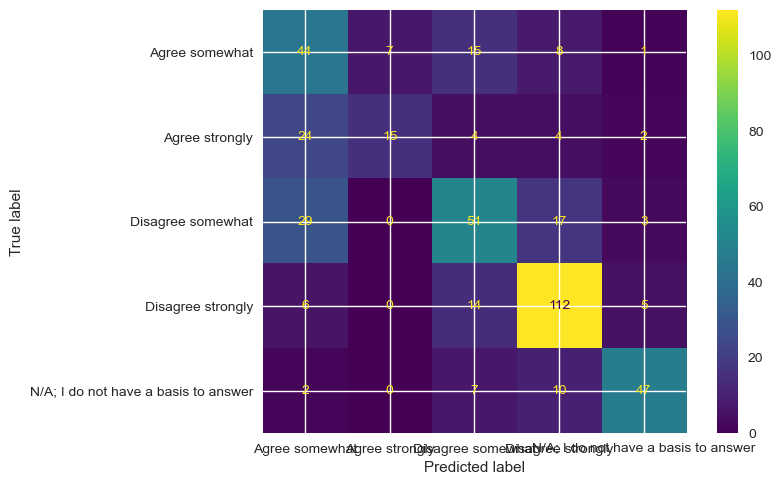

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay

# categoricals
target = 'willing_to_pay_no_ads_news'
df_x = df.drop(columns=[target])
df_x = pd.get_dummies(df_x)
df_y = df[target]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

# Convert the target variable to integer labels
le = LabelEncoder()
y = le.fit_transform(df[target])

# Train a random forest classifier
rf = RandomForestClassifier(n_estimators=300, random_state=42, max_depth=15, min_samples_split=10, max_features='sqrt')
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Generate a classification report
report = classification_report(y_test, y_pred, target_names=np.unique(df[target]))

# Print the classification report
print(report)

# Generate a confusion matrix and display it using ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=np.unique(df[target]))
cmd.plot()
plt.show()


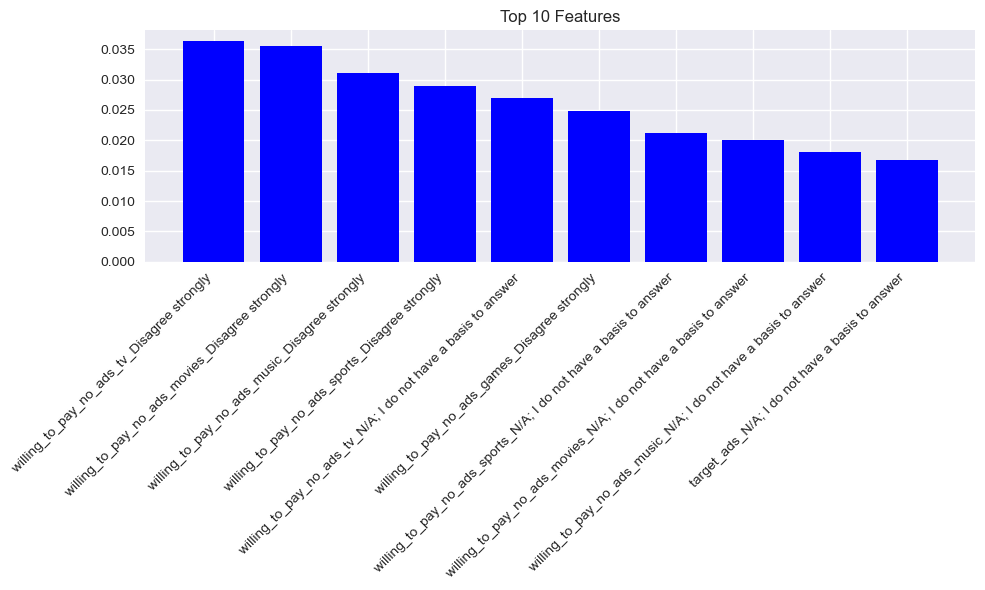

In [65]:
# Plot feature importances
importances = rf.feature_importances_

# Sort the features by importance
indices = np.argsort(importances)[::-1]

# Get the top 10 features and their importances
top_features = df_x.columns[indices][:10]
top_importances = importances[indices][:10]

# Plot the top 10 features
plt.figure(figsize=(10,6))
plt.title('Top 10 Features')
plt.bar(range(len(top_importances)), top_importances, color='blue', align='center')
plt.xticks(range(len(top_importances)), top_features, rotation=45, ha='right')
plt.tight_layout()
plt.show()


                                      precision    recall  f1-score   support

                      Agree somewhat       0.39      0.45      0.42        75
                      Agree strongly       0.67      0.24      0.36        49
                   Disagree somewhat       0.38      0.23      0.29       100
                   Disagree strongly       0.51      0.77      0.61       137
N/A; I do not have a basis to answer       0.73      0.58      0.64        66

                            accuracy                           0.50       427
                           macro avg       0.53      0.46      0.46       427
                        weighted avg       0.51      0.50      0.48       427



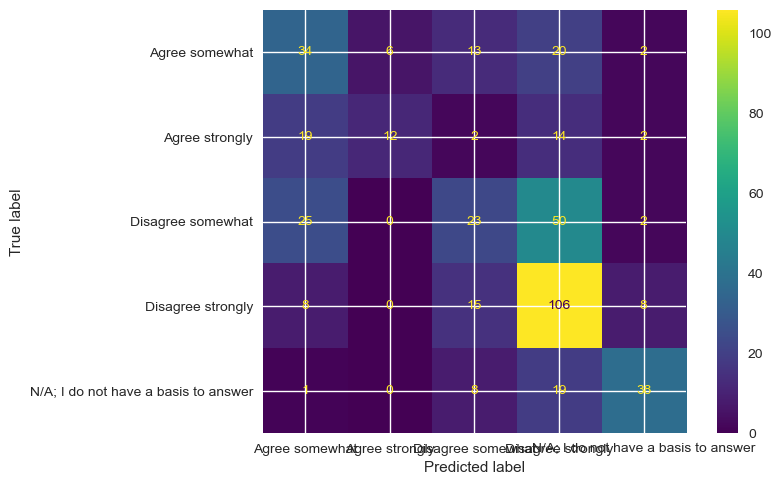

In [66]:
# try a random forest after removing the willingness to pay variables
# categoricals
target = 'willing_to_pay_no_ads_news'
other_willingness_cols = [col for col in df.columns if 'willing_to_pay' in col and 'willing_to_pay_no_ads_news' not in col]
cols_to_drop = [target] + other_willingness_cols

df_x = df.drop(columns=cols_to_drop)
df_x = pd.get_dummies(df_x)
df_y = df[target]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

# Convert the target variable to integer labels
le = LabelEncoder()
y = le.fit_transform(df[target])

# Train a random forest classifier
rf = RandomForestClassifier(n_estimators=300, random_state=42, max_depth=15, min_samples_split=10, max_features='sqrt')
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Generate a classification report
report = classification_report(y_test, y_pred, target_names=np.unique(df[target]))

# Print the classification report
print(report)

# Generate a confusion matrix and display it using ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=np.unique(df[target]))
cmd.plot()
plt.show()



Interestingly, when we remove the other willingness to pay features, although the overall accuracy goes down, the precision of the 2 groups we are interested in almost stays the same

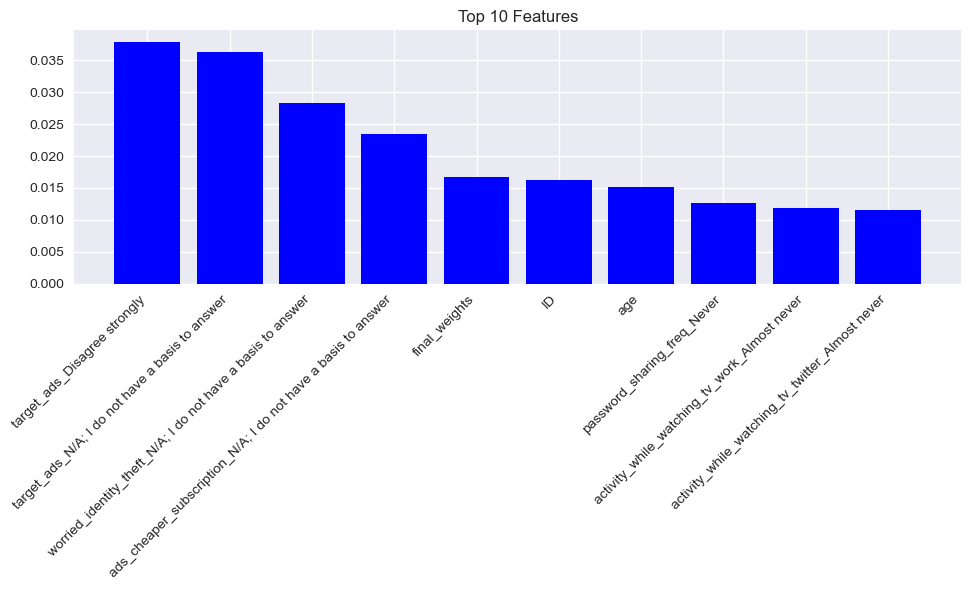

In [67]:
# Plot feature importances
importances = rf.feature_importances_

# Sort the features by importance
indices = np.argsort(importances)[::-1]

# Get the top 10 features and their importances
top_features = df_x.columns[indices][:10]
top_importances = importances[indices][:10]

# Plot the top 10 features
plt.figure(figsize=(10,6))
plt.title('Top 10 Features')
plt.bar(range(len(top_importances)), top_importances, color='blue', align='center')
plt.xticks(range(len(top_importances)), top_features, rotation=45, ha='right')
plt.tight_layout()
plt.show()
